(Group 24)

(Benjamin Fletcher, Konrad Retzlaff, Sebastian Schmülling)

(i6308020, i6331164, i6304238)

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [6]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [7]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')
df_x = pd.read_csv("data/task_1/lm_scores/lm_X.csv")
df_y = pd.read_csv("data/task_1/lm_scores/lm_Y.csv")
df_z = pd.read_csv("data/task_1/lm_scores/lm_Z.csv")

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [8]:
# A
#Set X
print(df_x.value_counts(dropna=False))
print(type(df_x.value_counts()))
#Set Y
#print(df_y.value_counts())
#set Z
#print(df_z.value_counts())



question_id  result   
0            B            1
9418         B            1
9407         B            1
9408         C            1
9409         Answer: B    1
                         ..
4643         B            1
4644         Answer: B    1
4645         C            1
4646         A            1
14041        Answer: A    1
Name: count, Length: 13882, dtype: int64
<class 'pandas.core.series.Series'>


In [9]:
# B


#We can see from the initial outputs that some of the results are simple A,B,C,D as expected, however some of the formats have extra text, 
# either specifying the answer or explaining it. 
#Unexpected Type Examples
#'Answer: D'
#'The demand for labor is derived from the demand for the products produced by labor., so the answer is D'
#I wrote this code which groups results by the expected formats. Here we can see we have the normal types, the types with 'Answer:' and also multiple explanations.




#On Sebastians note: 

#Also oberserve that value_counts() retunds a Series object,with unique values as index and their counts as values. If you compare the lenght of the Series object with the number of
#rows in the dataframe, you can see that the number of unique values is less than the number of rows in the dataframe. This is because the series object does not count NaN values and also
#does only count unique values.




# TODO: Write proper markdown file

unexpected = df_x.loc[~df_x["result"].isin(["A", "B", "C", "D"]), "result"]
print(unexpected.value_counts())
print ("Amount of unexpected formats:",len(unexpected))



result
A                                                                                                                 1657
Answer: A                                                                                                         1398
B                                                                                                                  793
Answer: B                                                                                                          760
C                                                                                                                  622
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressperson who retires to take a po

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [10]:
#A
df_x_filtered = df_x[df_x["result"].str.len() < 10].copy(deep=True)
df_y_filtered = df_y[df_y["result"].str.len() < 10].copy(deep=True)
df_z_filtered = df_z[df_z["result"].str.len() < 10].copy(deep=True)
#Based on the documentation, this should sort it all out so we only keep stuff less than 10
##From above, we could notice that any of the long explanation always end with the actual short result
#Eg, David Hume, so the answer is D                                                                                       1
#Brahminic orthodoxy, so the answer is A
#So I will predict that we should be able to fix most cases by simply identifying the long results, then just taking the last letter as the result
#However this is not what we were asked to do so I will leave it out for now
print(df_x_filtered.value_counts())
#From here we can see that the output so far seems to be <10 characters, and the only weird results will be the ones in the format 'Answer: B' for instance

question_id  result   
0            B            1
9428         Answer: B    1
9403         Answer: D    1
9404         B            1
9405         D            1
                         ..
4644         Answer: B    1
4645         C            1
4646         A            1
4647         A            1
14041        Answer: A    1
Name: count, Length: 13509, dtype: int64


In [11]:
#B
#Deep = true means that it creates a new dataframe with a copy of everything we are trying to save
#First we get rid of the whitespace, especially for the results with 'Answer: B' format
def clean_answer(raw_answer, dash_pattern='-'):
    
    #Remove any whitespace and convert to string in case of anomalies
    ans = str(raw_answer).strip()
    
    # Remove any "Answer:"(now we removed spaces so we don't need to remove any spaces)
    ans = ans.replace("Answer:", "").strip()
    
    #if it does have a dash pattern, we can remove it (based on the example above)
    ans = ans.replace(dash_pattern, "").strip()
    
    #finally to make sure we are beign case-sensitive, we convert everything to uppercase
    ans = ans.upper()
    
    # Sanity check to see that the answers make sense
    valid_answers = {"A", "B", "C", "D"}
    if ans not in valid_answers:
        print('none')
        return None  # give a placeholder for now if it doesn't work properly and print 'none' to see if anything has gone wrong
    
    return ans

df_x_filtered["result"] = df_x_filtered["result"].apply(clean_answer)
df_y_filtered["result"] = df_y_filtered["result"].apply(clean_answer)
df_z_filtered["result"] = df_z_filtered["result"].apply(clean_answer)
#We could also choose to drop any values, as  
print(df_x_filtered.value_counts())
#After looking through the filtered X results, we can see that there don't appear to be any mismatches anymore, and we will remove the None results as well
df_x_filtered = df_x_filtered.dropna(subset=["result"])
df_y_filtered = df_y_filtered.dropna(subset=["result"])
df_z_filtered = df_z_filtered.dropna(subset=["result"])





none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none
none


In [12]:
print(f"Original df_x shape: {df_x.shape}")
print(f"Filtered df_x shape: {df_x_filtered.shape}\n")

print(f"Original df_y shape: {df_y.shape}")
print(f"Filtered df_y shape: {df_y_filtered.shape}\n")

print(f"Original df_z shape: {df_z.shape}")
print(f"Filtered df_z shape: {df_z_filtered.shape}")

#This was just an extra check to see that all the 'None' placeholders were filtered out as I was getting confused about the data size
bad_rows = df_x_filtered[df_x_filtered["result"].isin(["none", "None"])]
print(bad_rows["result"])



Original df_x shape: (13882, 2)
Filtered df_x shape: (13436, 2)

Original df_y shape: (13978, 2)
Filtered df_y shape: (13551, 2)

Original df_z shape: (13923, 2)
Filtered df_z shape: (12753, 2)
Series([], Name: result, dtype: object)


C. /Discuss:/

Looking at the previous and current sizes/shapes of the dataframes, we can see that cleaning did remove a lot of rows from the datasets. It is what we expect, as we remove anything bigger than 10. However, I imagine we could still have a lot more rows if we did less extreme filtering for the length. I have done so below, and we can see that for dataframe X, we ended up with 13570 instead of the filtered 13436, an extra 134 rows, and same for the other dataframes. This is something to consider during the filtering process. The upside of this more flexible approach is that we don’t lose potentially valuable responses that include extra text or slight variations in formatting. On the downside, it does introduce a small risk of incorporating “messy” data if that extra text doesn’t consistently end with a valid letter or if it includes typos. However from the results below I seem to only see answers with the allowed format. So I think it worked successfully, primarily removing the 'None' seems to have been the only operation it performed.
For now, I will move forward with the alternate data, because I personally think the data will be more accurate.

In [13]:
# make copies of the dataframes for this test
df_x_alt = df_x.copy()
df_y_alt = df_y.copy()
df_z_alt = df_z.copy()

def clean_answerTest(raw_answer, dash_pattern='-'):
    
    # Same logic as before
    ans = str(raw_answer).strip()
    
    # Remove any "Answer:" text
    ans = ans.replace("Answer:", "").strip()
    ans = ans.replace(dash_pattern, "").strip()
    ans = ans.upper()
    
    # Take the last character in the string (this is the extra logic I wanted to test)
    if ans:
        ans = ans[-1]
    else:
        
        return None
    
    # Check if it's one of A, B, C, D (removed the 'none' print because it was getting annoying)
    valid_answers = {"A", "B", "C", "D"}
    if ans not in valid_answers:
        
        return None
    
    return ans

# Apply this cleaning function to the copies
df_x_alt["result"] = df_x_alt["result"].apply(clean_answerTest)
df_y_alt["result"] = df_y_alt["result"].apply(clean_answerTest)
df_z_alt["result"] = df_z_alt["result"].apply(clean_answerTest)

#Drop the rows of 'None' (same as above)
df_x_alt = df_x_alt.dropna(subset=["result"])
df_y_alt = df_y_alt.dropna(subset=["result"])
df_z_alt = df_z_alt.dropna(subset=["result"])


# Sanity check for df_x_alt
unexpected_x = df_x_alt.loc[~df_x_alt["result"].isin(["A", "B", "C", "D"]), "result"]
print(unexpected_x.value_counts())
print("Amount of unexpected formats in df_x_alt:", len(unexpected_x))

# Sanity check for df_y_alt
unexpected_y = df_y_alt.loc[~df_y_alt["result"].isin(["A", "B", "C", "D"]), "result"]
print(unexpected_y.value_counts())
print("Amount of unexpected formats in df_y_alt:", len(unexpected_y))

# Sanity check for df_z_alt
unexpected_z = df_z_alt.loc[~df_z_alt["result"].isin(["A", "B", "C", "D"]), "result"]
print(unexpected_z.value_counts())
print("Amount of unexpected formats in df_z_alt:", len(unexpected_z))




# check the only answers are in the right format
print("df_x_alt shape:", df_x_alt.shape)
print("df_y_alt shape:", df_y_alt.shape)
print("df_z_alt shape:", df_z_alt.shape)

print("\nValue counts for df_x_alt:")
print(df_x_alt["result"].value_counts())

print("\nValue counts for df_y_alt:")
print(df_y_alt["result"].value_counts())

print("\nValue counts for df_z_alt:")
print(df_z_alt["result"].value_counts())


Series([], Name: count, dtype: int64)
Amount of unexpected formats in df_x_alt: 0
Series([], Name: count, dtype: int64)
Amount of unexpected formats in df_y_alt: 0
Series([], Name: count, dtype: int64)
Amount of unexpected formats in df_z_alt: 0
df_x_alt shape: (13570, 2)
df_y_alt shape: (13681, 2)
df_z_alt shape: (13334, 2)

Value counts for df_x_alt:
result
A    5844
B    3003
C    2373
D    2350
Name: count, dtype: int64

Value counts for df_y_alt:
result
D    5808
C    3274
B    2545
A    2054
Name: count, dtype: int64

Value counts for df_z_alt:
result
D    3498
C    3406
B    3278
A    3152
Name: count, dtype: int64


### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [14]:
# A
# I am moving forward with the alt data from the filtering I used above (the second version, including the longer results)
df_x_merged_alt = df_x_alt.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")
df_y_merged_alt = df_y_alt.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")
df_z_merged_alt = df_z_alt.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")

#Sanity check
df_x_merged_alt.columns

Index(['question_id', 'result', 'answer', 'subject'], dtype='object')

In [15]:
# B
#Now we check how many were correct (comparing the results and answers)
df_x_merged_alt["correct"] = df_x_merged_alt["result"] == df_x_merged_alt["answer"]
df_y_merged_alt["correct"] = df_y_merged_alt["result"] == df_y_merged_alt["answer"]
df_z_merged_alt["correct"] = df_z_merged_alt["result"] == df_z_merged_alt["answer"]

# Compute average score (the mean of the boolean 'correct')
x_score = df_x_merged_alt["correct"].mean()
y_score = df_y_merged_alt["correct"].mean()
z_score = df_z_merged_alt["correct"].mean()

# Print the results
print(f"X alt: {x_score:.3f}")
print(f"Y alt: {y_score:.3f}")
print(f"Z alt: {z_score:.3f}")

X alt: 0.768
Y alt: 0.746
Z alt: 0.662


In [16]:
#I will also compute it for the old dataset with the more primitive filtering
df_x_merged = df_x_filtered.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")
df_y_merged = df_y_filtered.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")
df_z_merged = df_z_filtered.merge(df_test[["question_id", "answer","subject"]], on="question_id", how="inner")

#Now we check how many were correct (comparing the results and answers)
df_x_merged["correct"] = df_x_merged["result"] == df_x_merged["answer"]
df_y_merged["correct"] = df_y_merged["result"] == df_y_merged["answer"]
df_z_merged["correct"] = df_z_merged["result"] == df_z_merged["answer"]

# Compute average score (the mean of the boolean 'correct')
x_score = df_x_merged["correct"].mean()
y_score = df_y_merged["correct"].mean()
z_score = df_z_merged["correct"].mean()

# Print the results
print(f"X: {x_score:.3f}")
print(f"Y: {y_score:.3f}")
print(f"Z: {z_score:.3f}")
#Here we can see the results are very similar, so it didn't make a huge difference, however the alt results should represent the mean better

X: 0.767
Y: 0.746
Z: 0.663


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [17]:
#A I will just continue with the original filtered results
print(df_x_merged.columns)
print(df_y_merged.columns)
print(df_z_merged.columns)
#went back and added the merge to include subjects (oversight on my part)
count_x = df_x_merged.groupby("subject")["question_id"].nunique().rename("count_x")
count_y = df_y_merged.groupby("subject")["question_id"].nunique().rename("count_y")
count_z = df_z_merged.groupby("subject")["question_id"].nunique().rename("count_z")
print(count_x)
print(count_y)
print(count_z)
#Now we have the counts for everything, time to look at it side-by-side

Index(['question_id', 'result', 'answer', 'subject', 'correct'], dtype='object')
Index(['question_id', 'result', 'answer', 'subject', 'correct'], dtype='object')
Index(['question_id', 'result', 'answer', 'subject', 'correct'], dtype='object')
subject
abstract algebra                         95
anatomy                                 129
astronomy                               144
business ethics                          98
clinical knowledge                      259
college biology                         139
college chemistry                        96
college computer science                 97
college mathematics                      99
college medicine                        168
college physics                          98
computer security                        95
conceptual physics                      226
econometrics                            112
electrical engineering                  141
elementary mathematics                  367
formal logic                            109
g

In [46]:
#B
df_counts = pd.concat([count_x, count_y, count_z], axis=1).fillna(0)
print(df_counts)
#Now we can see the differences, lets calculate!
df_counts["diff_xy"] = (df_counts["count_y"] - df_counts["count_x"]).abs() / df_counts["count_x"].clip(lower=1)
df_counts["diff_xz"] = (df_counts["count_z"] - df_counts["count_x"]).abs() / df_counts["count_x"].clip(lower=1)
df_counts["diff_yz"] = (df_counts["count_z"] - df_counts["count_y"]).abs() / df_counts["count_y"].clip(lower=1)


                                     count_x  count_y  count_z
subject                                                       
abstract algebra                          95       97       95
anatomy                                  129      130      125
astronomy                                144      148      137
business ethics                           98       96       92
clinical knowledge                       259      261      244
college biology                          139      140      131
college chemistry                         96       98       84
college computer science                  97       98       84
college mathematics                       99      100       93
college medicine                         168      167      161
college physics                           98      100       91
computer security                         95       98       87
conceptual physics                       226      225      212
econometrics                             112      107  

In [47]:
#Here we check if it is actually imbalanced (based on the rules given above)
imbalanced_subjects = df_counts[
    (df_counts["diff_xy"] > 0.1) |
    (df_counts["diff_xz"] > 0.1) |
    (df_counts["diff_yz"] > 0.1)
]
print(imbalanced_subjects)

                          count_x  count_y  count_z   diff_xy   diff_xz  \
subject                                                                   
college chemistry              96       98       84  0.020833  0.125000   
college computer science       97       98       84  0.010309  0.134021   
computer security              95       98       87  0.031579  0.084211   
formal logic                  109      123      113  0.128440  0.036697   
logical fallacies             154      136      147  0.116883  0.045455   
moral disputes                329      304      250  0.075988  0.240122   
moral scenarios               737      865      774  0.173677  0.050204   

                           diff_yz  
subject                             
college chemistry         0.142857  
college computer science  0.142857  
computer security         0.112245  
formal logic              0.081301  
logical fallacies         0.080882  
moral disputes            0.177632  
moral scenarios           0.

In [48]:
#C

# Comment from Sebastian:
#In my opinion downsampling is the better approach here. We shoud disccus about this.
# TODO: Discuss rebalancing strategies




#The information above looks good, now we need to split it up more
df_x_balanced_list = []
df_y_balanced_list = []
df_z_balanced_list = []
#This annoying dataframe loop was done with chatGPT, because I needed to seperate the data for it to make sense properly.
for subj, row in df_counts.iterrows():
    count_x_sub = int(row["count_x"])
    count_y_sub = int(row["count_y"])
    count_z_sub = int(row["count_z"])
    min_count = min(count_x_sub, count_y_sub, count_z_sub)
    if min_count == 0:
        continue
    x_sub_df = df_x_merged[df_x_merged["subject"] == subj].sample(n=min_count, random_state=0)
    y_sub_df = df_y_merged[df_y_merged["subject"] == subj].sample(n=min_count, random_state=0)
    z_sub_df = df_z_merged[df_z_merged["subject"] == subj].sample(n=min_count, random_state=0)
    df_x_balanced_list.append(x_sub_df)
    df_y_balanced_list.append(y_sub_df)
    df_z_balanced_list.append(z_sub_df)

df_x_balanced = pd.concat(df_x_balanced_list, ignore_index=True)
df_y_balanced = pd.concat(df_y_balanced_list, ignore_index=True)
df_z_balanced = pd.concat(df_z_balanced_list, ignore_index=True)

x_score_balanced = df_x_balanced["correct"].mean()
y_score_balanced = df_y_balanced["correct"].mean()
z_score_balanced = df_z_balanced["correct"].mean()

print("Subjects with >10% difference:\n", imbalanced_subjects)
print(f"Balanced X accuracy: {x_score_balanced:.3f}")
print(f"Balanced Y accuracy: {y_score_balanced:.3f}")
print(f"Balanced Z accuracy: {z_score_balanced:.3f}")


Subjects with >10% difference:
                           count_x  count_y  count_z   diff_xy   diff_xz  \
subject                                                                   
college chemistry              96       98       84  0.020833  0.125000   
college computer science       97       98       84  0.010309  0.134021   
computer security              95       98       87  0.031579  0.084211   
formal logic                  109      123      113  0.128440  0.036697   
logical fallacies             154      136      147  0.116883  0.045455   
moral disputes                329      304      250  0.075988  0.240122   
moral scenarios               737      865      774  0.173677  0.050204   

                           diff_yz  
subject                             
college chemistry         0.142857  
college computer science  0.142857  
computer security         0.112245  
formal logic              0.081301  
logical fallacies         0.080882  
moral disputes            0.17763

To explain whatI just did. First, each model’s merged DataFrame is grouped by subject to see how many questions it answered. That number is recorded for each subject in three separate counts. These counts are combined into a single table, where any absent subjects are filled with zeros. The code then calculates how much each subject’s counts differ between models, expressed as a proportion relative to the first model’s count. If that difference is more than ten percent for any pair of models, that subject is labeled imbalanced. Next, the script rebalances by looping over every subject and finding the smallest count among the three. A sample of that size is drawn for each model, ensuring all three have the same number of questions for the subject. Finally, these sampled rows are concatenated back into one balanced dataset per model (the annoying part), and the new accuracy scores are computed from the “correct” column. This approach allows a fairer comparison between models, as each is evaluated on an equal footing in terms of how many questions per subject it sees, as stated above in the instructions.

## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [49]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [50]:
df_mmlu.head()

,result,question_id,question,A,B,C,D,answer,subject,correct,model_name
0,B,0,Find the degree for the given field extension ...,0,4,2,6,B,abstract algebra,True,X
1,C,1,"Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...",8,2,24,120,C,abstract algebra,True,X
2,D,2,Find all zeros in the indicated finite field o...,0,1,"0,1","0,4",D,abstract algebra,True,X
3,B,3,Statement 1 | A factor group of a non-Abelian ...,"True, True","False, False","True, False","False, True",B,abstract algebra,True,X
4,D,7,Statement 1 | A ring homomorphism is one to on...,"True, True","False, False","True, False","False, True",D,abstract algebra,True,X


In [51]:
#A

from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_mse_acc(df: pd.DataFrame) -> list:

    df['num_correct'] = df['correct'].astype(int)
    results = []

    for model, group in df.groupby('model_name'):
        n = len(group)
        accuracy = group['correct'].mean()
        se = np.sqrt(accuracy * (1 - accuracy) / n)
        evaluation = {
            'model': model,
            'se': se,
            'accuracy': accuracy
        }
        results.append(evaluation)
    return results


results_mmlu = calculate_mse_acc(df_mmlu)
results_other = calculate_mse_acc(df_other)

print('MMLU Dataset results:',results_mmlu)
print('Other Dataset results:',results_other)



# The standard error (SE) is a way of measuring how much our estimate (like the mean accuracy) would change if we repeated the experiment multiple times


MMLU Dataset results: [{'model': 'X', 'se': 0.0040375408420159, 'accuracy': 0.7435875512995896}, {'model': 'Y', 'se': 0.0039403422362402785, 'accuracy': 0.7615424076607387}, {'model': 'Z', 'se': 0.004392656503566318, 'accuracy': 0.6559507523939808}]
Other Dataset results: [{'model': 'X', 'se': 0.006666735104077729, 'accuracy': 0.787975525405693}, {'model': 'Y', 'se': 0.0073158349839375055, 'accuracy': 0.7209364192604416}, {'model': 'Z', 'se': 0.007659136023483982, 'accuracy': 0.6717212024474595}]


In [52]:
df_result_mmlu = pd.DataFrame(results_mmlu)
df_result_other = pd.DataFrame(results_other)

print("Datsset LLMU\n:",df_result_mmlu)
print("Datsset Other\n:",df_result_other)


Datsset LLMU
:   model        se  accuracy
0     X  0.004038  0.743588
1     Y  0.003940  0.761542
2     Z  0.004393  0.655951
Datsset Other
:   model        se  accuracy
0     X  0.006667  0.787976
1     Y  0.007316  0.720936
2     Z  0.007659  0.671721


In [53]:
def confidence(z_score: float, df) -> pd.DataFrame:


    df['ci_lower'] = df['accuracy'] - (z_score * df['se'])
    df['ci_upper'] = df['accuracy'] + (z_score * df['se'])

    return df

In [54]:
df_result_mmlu = confidence(1.96, df_result_mmlu)
df_result_other = confidence(1.96, df_result_other)

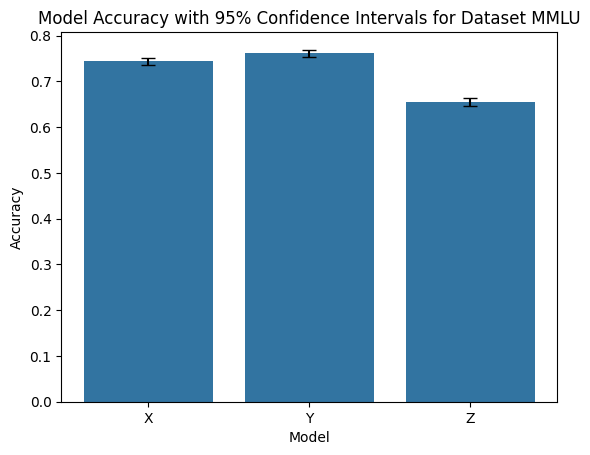

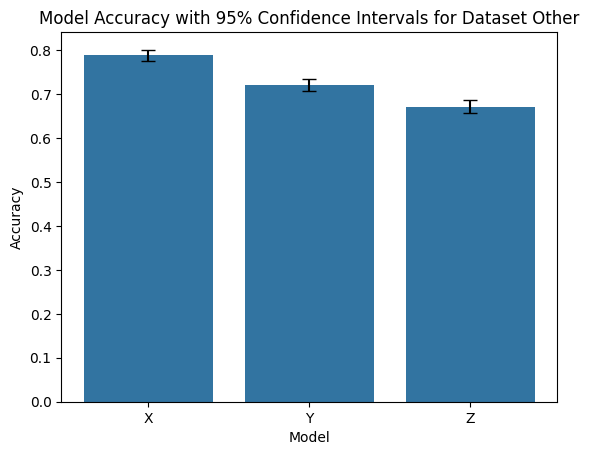

In [55]:
import seaborn as sns



#LLMU Dataset plot
sns.barplot(x='model', y='accuracy', data=df_result_mmlu)

for index, row in df_result_mmlu.iterrows():
    plt.errorbar(x=index, y=row['accuracy'], 
                 yerr=[[row['accuracy'] - row['ci_lower']], [row['ci_upper'] - row['accuracy']]], # Calcualte the lenght of the error bars.
                 fmt='none', c='black', capsize=5)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Intervals for Dataset MMLU')
#plt.ylim(0, 1)
plt.show()




#Other Dataset plot
sns.barplot(x='model', y='accuracy', data=df_result_other)

for index, row in df_result_other.iterrows():
    plt.errorbar(x=index, y=row['accuracy'], 
                 yerr=[[row['accuracy'] - row['ci_lower']], [row['ci_upper'] - row['accuracy']]], # Calcualte the lenght of the error bars.
                 fmt='none', c='black', capsize=5)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with 95% Confidence Intervals for Dataset Other')
#plt.ylim(0, 1)
plt.show()


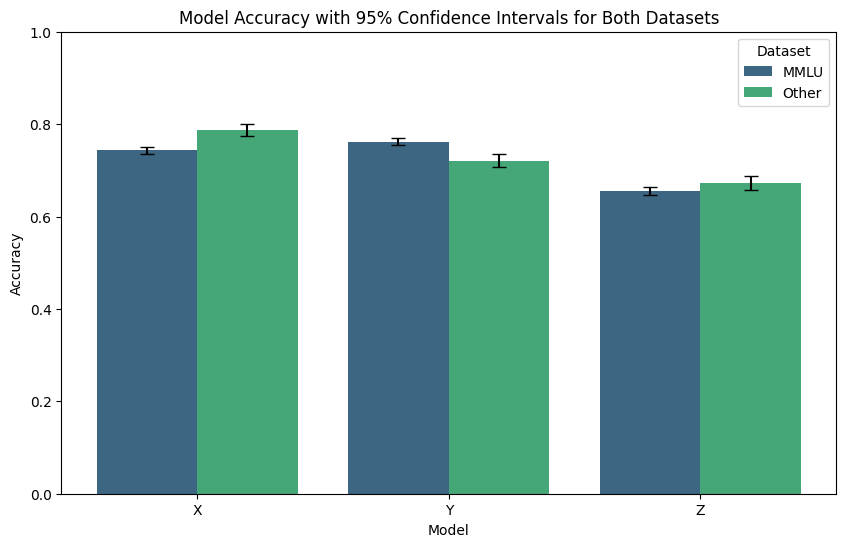

In [56]:
df_result_mmlu['dataset'] = 'MMLU'
df_result_other['dataset'] = 'Other'
df_combined = pd.concat([df_result_mmlu, df_result_other], ignore_index=True)
#print(df_combined)

models_order = sorted(df_combined['model'].unique())
datasets_order = ['MMLU', 'Other'] 

df_combined['model'] = pd.Categorical(df_combined['model'], categories=models_order, ordered=True)
df_combined['dataset'] = pd.Categorical(df_combined['dataset'], categories=datasets_order, ordered=True)
df_combined = df_combined.sort_values(['model', 'dataset'])


plt.figure(figsize=(10, 6))

ax = sns.barplot(x='model', y='accuracy', hue='dataset',
                 data=df_combined, errorbar=None, palette="viridis")


for container, dataset in zip(ax.containers, datasets_order):

    subset = df_combined[df_combined['dataset'] == dataset]
    subset = subset.set_index('model').loc[models_order].reset_index()

    for bar, (_, row) in zip(container, subset.iterrows()):
        x = bar.get_x() + bar.get_width() / 2.
        y = bar.get_height()
        lower_err = y - row['ci_lower']
        upper_err = row['ci_upper'] - y
        error = [[lower_err], [upper_err]]

        ax.errorbar(x, y, yerr=error, fmt='none', c='black', capsize=5)

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy with 95% Confidence Intervals for Both Datasets')
ax.set_ylim(0, 1)  
plt.legend(title="Dataset")
plt.show()


In [29]:
# TODO Write Markdown about interpretation.

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

C:\Users\kobra\AppData\Local\Temp\ipykernel_12624\315527555.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='answer', y='correct', data=df_combined, hue='dataset', ci=None, palette= custom_palette)


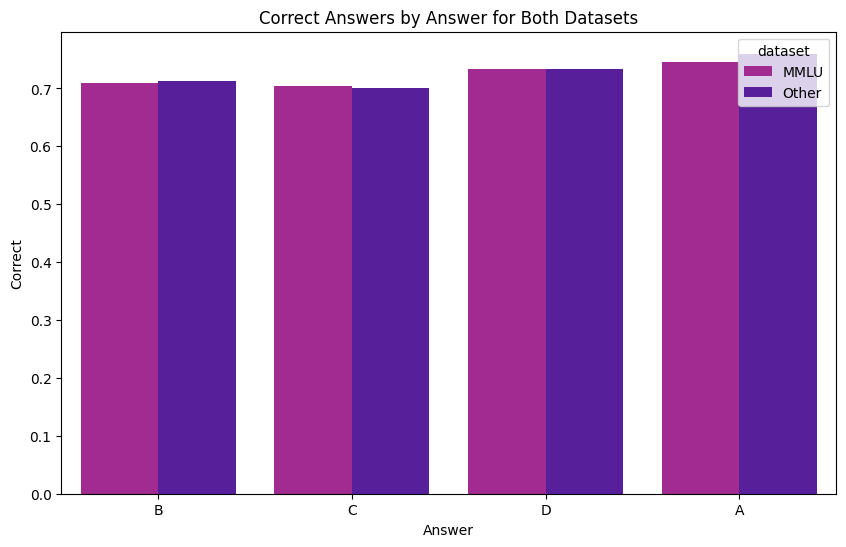

In [57]:
#A 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'MMLU': '#b5179e', 'Other': '#560bad'}
df_mmlu['dataset'] = 'MMLU'
df_other['dataset'] = 'Other'
df_combined = pd.concat([df_mmlu, df_other], ignore_index=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='answer', y='correct', data=df_combined, hue='dataset', ci=None, palette= custom_palette)

plt.xlabel('Answer')
plt.ylabel('Correct')
plt.title('Correct Answers by Answer for Both Datasets')
plt.show()


In [58]:
import pandas as pd
from scipy.stats import chi2_contingency


df_mmlu['dataset'] = 'MMLU'
df_other['dataset'] = 'Other'
df_combined = pd.concat([df_mmlu, df_other], ignore_index=True)
df_combined['dataset'] = df_combined['dataset'].map({'MMLU': 0, 'Other': 1})


contingency_table = pd.crosstab(df_combined['dataset'], df_combined['correct'])
print(type(contingency_table))
print(contingency_table)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.5
conclusion = "Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets." if p_value < alpha else "Fail to reject the null hypothesis: No significant difference in the distribution of correct answers between the two datasets."

print(chi2_stat, p_value, conclusion)

<class 'pandas.core.frame.DataFrame'>
correct  False  True 
dataset              
0         9812  25276
1         3080   8197
1.773549812509137 0.18294337124264082 Reject the null hypothesis: There is a significant difference in the distribution of correct answers between the two datasets.


### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [32]:
df_other.head()

,result,question_id,question,A,B,C,D,answer,correct,model_name,num_correct,dataset
0,B,0,Which factor will most likely cause a person t...,a leg muscle relaxing after exercise,a bacterial population in the bloodstream,several viral particles on the skin,carbohydrates being digested in the stomach,B,True,X,1,Other
1,B,1,Lichens are symbiotic organisms made of green ...,carbon dioxide,food,protection,water,B,True,X,1,Other
2,D,2,When a switch is used in an electrical circuit...,cause the charge to build.,increase and decrease the voltage.,cause the current to change direction.,stop and start the flow of current.,D,True,X,1,Other
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X,1,Other
4,C,4,"Rocks are classified as igneous, metamorphic, ...",their color,their shape,how they formed,the minerals they contain,C,True,X,1,Other


In [59]:
#A
def calculate_mean_accuracy_by_option(df):
    results = df.groupby('answer')['correct'].mean().reset_index()
    results.columns = ['answer', 'mean_accuracy']
    return results

mean_accuracy_mmlu = calculate_mean_accuracy_by_option(df_mmlu[df_mmlu['dataset'] == 'MMLU'])
mean_accuracy_other = calculate_mean_accuracy_by_option(df_other[df_other['dataset'] == 'Other'])

print("Mean Accuracy by Answer Option (MMLU Dataset):")
print(mean_accuracy_mmlu)

print("\nMean Accuracy by Answer Option (Other Dataset):")
print(mean_accuracy_other)

Mean Accuracy by Answer Option (MMLU Dataset):
  answer  mean_accuracy
0      A       0.746534
1      B       0.709480
2      C       0.703497
3      D       0.732995

Mean Accuracy by Answer Option (Other Dataset):
  answer  mean_accuracy
0      A       0.760049
1      B       0.712664
2      C       0.700577
3      D       0.733749


In [34]:
#B
df_mmlu_A = df_mmlu[df_mmlu['answer'] == 'A']
df_other_A = df_other[df_other['answer'] == 'A']

df_other_A.head()

,result,question_id,question,A,B,C,D,answer,correct,model_name,num_correct,dataset
3,A,3,Which of the following is an example of an ass...,contact lens,motorcycle,raincoat,coffee pot,A,True,X,1,Other
6,A,6,Which two body systems are directly involved i...,muscular and skeletal,digestive and muscular,skeletal and respiratory,respiratory and digestive,A,True,X,1,Other
10,A,10,Which of the following was probably most impor...,plant decomposition,radioactive decay,water erosion,wind erosion,A,True,X,1,Other
13,A,14,Many natural rock formations change color over...,chemical weathering,mechanical weathering,water erosion,wind erosion,A,True,X,1,Other
14,A,15,"A population of small, plant-eating beetles li...",It would be mostly light brown beetles.,It would be mostly dark green beetles.,It would be mostly carnivorous beetles.,It would be mostly very large beetles.,A,True,X,1,Other


In [35]:
mean_accuracy_mmlu_A = df_mmlu_A['correct'].astype(int).mean()
mean_accuracy_other_A = df_other_A['correct'].astype(int).mean()


t_stat, p_value = ttest_ind(df_mmlu_A['correct'].astype(int), df_other_A['correct'].astype(int))

#calculate the 95% confidence interval for the difference in means
mean_diff = mean_accuracy_mmlu_A - mean_accuracy_other_A
se_diff = np.sqrt(df_mmlu_A['correct'].var()/len(df_mmlu_A) + df_other_A['correct'].var()/len(df_other_A))
ci_low = mean_diff - 1.96 * se_diff
ci_high = mean_diff + 1.96 * se_diff

print(f"Mean accuracy when the correct answer is 'A' (MMLU): {mean_accuracy_mmlu_A}")
print(f"Mean accuracy when the correct answer is 'A' (Other): {mean_accuracy_other_A}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
print(f"95% confidence interval for the difference in means: ({ci_low}, {ci_high})")

if p_value < 0.05:
    print("There is a significant difference in performance between the two datasets when the correct answer is 'A'.")
else:
    print("There is no significant difference in performance between the two datasets when the correct answer is 'A'.")

Mean accuracy when the correct answer is 'A' (MMLU): 0.7465342437409477
Mean accuracy when the correct answer is 'A' (Other): 0.7600494743351887
T-statistic: -1.377464404374639
P-value: 0.16840693661914818
95% confidence interval for the difference in means: (-0.03267619066825582, 0.005645729479773865)
There is no significant difference in performance between the two datasets when the correct answer is 'A'.


In [36]:
#C

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [37]:
#A

B. /Discuss:/

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [38]:
#fancy code

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [39]:
#A

B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [40]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [41]:
#A

In [42]:
#B

In [43]:
#C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [44]:
#A

B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [45]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.